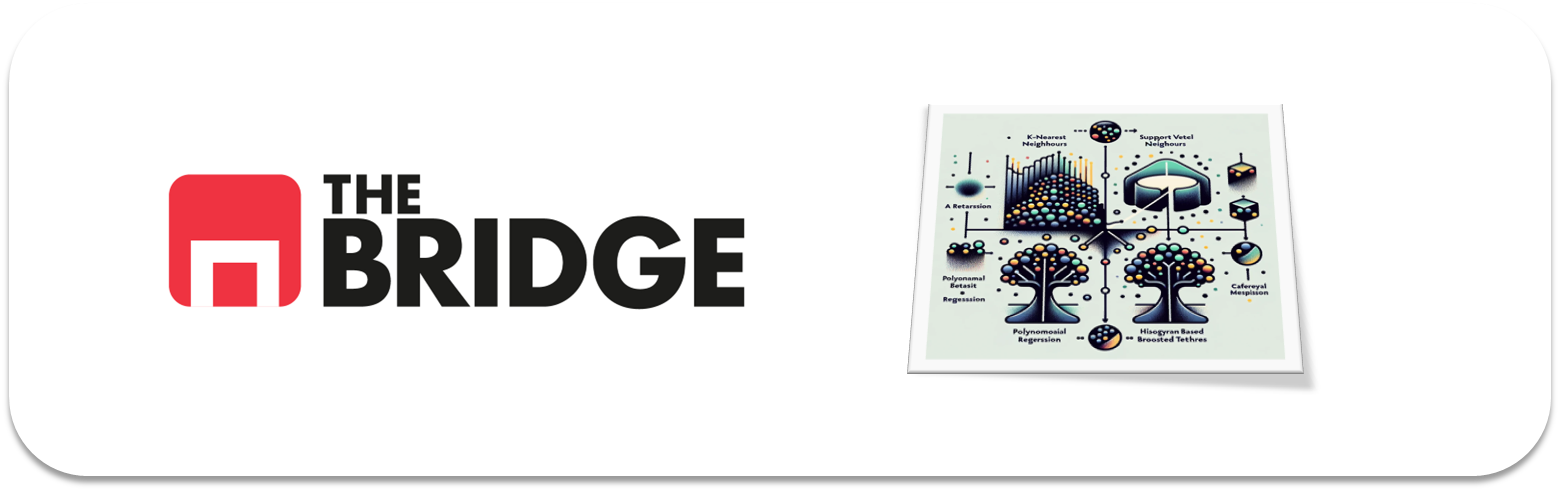

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import SMOTE 
from sklearn.impute import SimpleImputer 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report 
from catboost import CatBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
import numpy as np 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
salario_medio = df['MonthlyIncome'].mean()

# Reemplazar los valores nulos por la media
df['MonthlyIncome'].fillna(salario_medio, inplace=True)

In [5]:
dependientes = df['NumberOfDependents'].mean()

# Reemplazar los valores nulos por la media
df['NumberOfDependents'].fillna(salario_medio, inplace=True)

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,97.729387
std,0.253321,0.368148,15.077498,4.055787,9.122216,11509.914511,5.165422,4.035658,1.134325,4.018873,809.835552
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3550.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5700.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8033.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,6864.815420


In [7]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Es un probema de **clasificación binaria** y la variable target es la columna **SeriousDlqin2yrs**

### #1.3
Pinta la distribución de frecuencias del target y coméntala

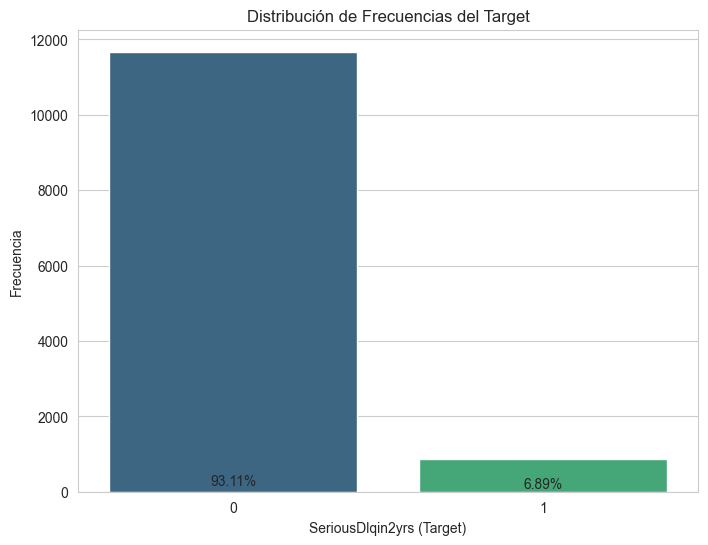

In [8]:
sns.set_style("whitegrid")


total_count = len(df)
freq_rel = df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 6))
sns.countplot(x='SeriousDlqin2yrs', data=df, palette='viridis')
for index, value in enumerate(freq_rel):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title('Distribución de Frecuencias del Target')
plt.xlabel('SeriousDlqin2yrs (Target)')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
freq_abs = df['SeriousDlqin2yrs'].value_counts()
freq_abs

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

>En esta columna, 'SeriousDlqin2yrs', se indica si el individuo estuvo o no en dificultades económicas en los últimos 2 años. Vemos que de los 12,537 individuos estudiados, 11,673 no habían estado en dificultades, lo que supone aproximadamente el 93% de los casos, frente a los 864 individuos que sí se vieron en dificultades, representando cerca del 7% del total. Como se puede apreciar gráficamente, hay una gran diferencia.

### 2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

### 2.1 ESCALADO DEL DATAFRAME.

In [10]:
columnas_escalar = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
                     'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'] #Dejamos fuera el target.


scaler = StandardScaler()

# Aplica el scaler solo a las características seleccionadas
df[columnas_escalar] = scaler.fit_transform(df[columnas_escalar])

In [11]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,-0.674939,-1.000169,-0.100992,-0.200786,-0.105028,0.681030,0.183543,-0.880913,-0.056825,-0.120683
1,0,-0.833791,1.453917,-0.100992,-0.185604,-0.173320,0.100222,-0.064258,0.000703,-0.056825,-0.120683
2,0,-0.897390,-0.602209,-0.100992,-0.199682,-0.162025,-1.254997,-0.064258,-0.880913,-0.056825,-0.118213
3,0,0.441130,-0.535882,-0.100992,-0.163291,0.040678,-0.867792,-0.064258,0.882320,-0.056825,-0.116978
4,0,1.819015,0.724324,-0.100992,-0.208538,0.127563,-1.061395,-0.064258,-0.880913,-0.056825,-0.119448


### 2.2 DIVISIÓN EN TRAIN Y TEST.

In [12]:
target = "SeriousDlqin2yrs"
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

### 2.3 EQUILIBRADO

In [13]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [14]:
y_train_smote.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

# 3 MODELOS.

### 3.1 K-NEAREST NEIGHBOURS

>CON EQUILIBRADO

In [15]:
knn_model_equilibrado = KNeighborsClassifier(n_neighbors=3)
knn_model_equilibrado.fit(X_train_smote, y_train_smote)  
y_pred_equilibrado = knn_model_equilibrado.predict(X_test)

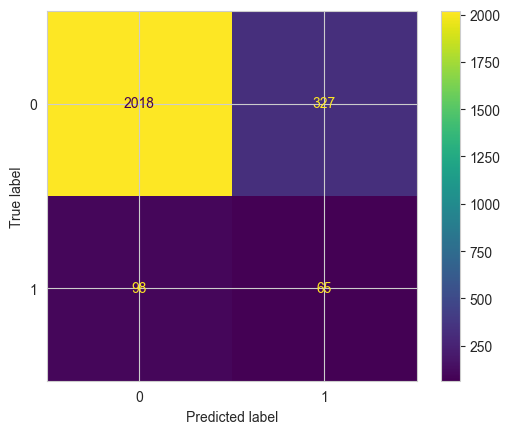

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_equilibrado);

In [17]:
print(classification_report(y_test, y_pred_equilibrado))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2345
           1       0.17      0.40      0.23       163

    accuracy                           0.83      2508
   macro avg       0.56      0.63      0.57      2508
weighted avg       0.90      0.83      0.86      2508



>SIN EQUILIBRADO

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)  
y_pred = knn_model.predict(X_test)

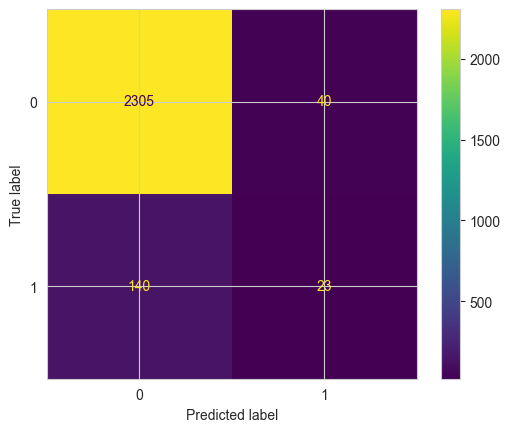

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2345
           1       0.37      0.14      0.20       163

    accuracy                           0.93      2508
   macro avg       0.65      0.56      0.58      2508
weighted avg       0.91      0.93      0.91      2508



### 3.2 CATBOOST

In [21]:
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

catboost_model.fit(X_train, y_train)  

y_pred_cat = catboost_model.predict(X_test)  


0:	learn: 0.6198520	total: 142ms	remaining: 14s
1:	learn: 0.5597968	total: 149ms	remaining: 7.32s
2:	learn: 0.5095729	total: 154ms	remaining: 4.97s
3:	learn: 0.4666416	total: 158ms	remaining: 3.8s
4:	learn: 0.4319044	total: 162ms	remaining: 3.08s
5:	learn: 0.4006254	total: 166ms	remaining: 2.61s
6:	learn: 0.3740127	total: 172ms	remaining: 2.28s
7:	learn: 0.3517551	total: 176ms	remaining: 2.03s
8:	learn: 0.3308091	total: 180ms	remaining: 1.82s
9:	learn: 0.3129439	total: 186ms	remaining: 1.67s
10:	learn: 0.2977104	total: 191ms	remaining: 1.54s
11:	learn: 0.2842777	total: 195ms	remaining: 1.43s
12:	learn: 0.2725062	total: 201ms	remaining: 1.34s
13:	learn: 0.2627631	total: 205ms	remaining: 1.26s
14:	learn: 0.2535737	total: 210ms	remaining: 1.19s
15:	learn: 0.2453061	total: 214ms	remaining: 1.12s
16:	learn: 0.2383787	total: 217ms	remaining: 1.06s
17:	learn: 0.2319852	total: 221ms	remaining: 1.01s
18:	learn: 0.2265116	total: 242ms	remaining: 1.03s
19:	learn: 0.2211305	total: 246ms	remaining:

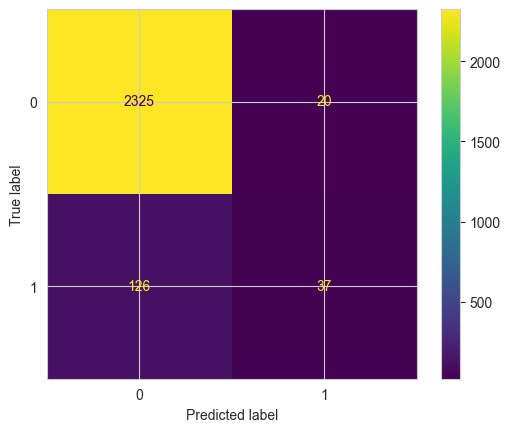

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cat);

In [23]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2345
           1       0.65      0.23      0.34       163

    accuracy                           0.94      2508
   macro avg       0.80      0.61      0.65      2508
weighted avg       0.93      0.94      0.93      2508



### 3.3 ADABOOST

In [24]:

ada_clf = AdaBoostClassifier(n_estimators=200, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)


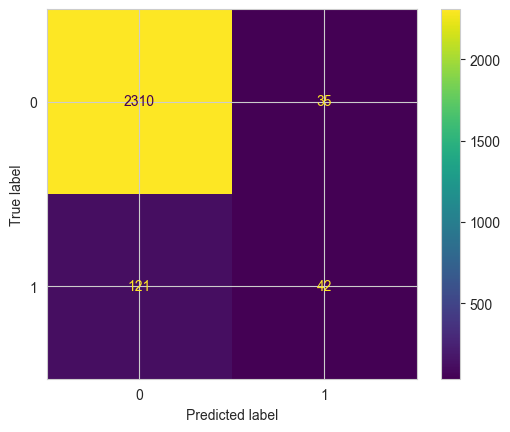

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada);

In [26]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2345
           1       0.55      0.26      0.35       163

    accuracy                           0.94      2508
   macro avg       0.75      0.62      0.66      2508
weighted avg       0.92      0.94      0.93      2508



### COMPARACION DE MODELOS.

In [27]:
model_set = [knn_model_equilibrado, knn_model,catboost_model, ada_clf]
model_names = ['VECINOS EQUILIBRADOS',"VECINOS DESEQUILIBRADOS",'EL GATO', "ADA"] 
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_smote, y_train, cv = 3, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)] 
print()
print("############################################################") 
print()
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=3)
0:	learn: 0.6197450	total: 3.51ms	remaining: 347ms
1:	learn: 0.5607526	total: 6.71ms	remaining: 329ms
2:	learn: 0.5103761	total: 9.65ms	remaining: 312ms
3:	learn: 0.4671632	total: 12.5ms	remaining: 299ms
4:	learn: 0.4318741	total: 15.3ms	remaining: 291ms
5:	learn: 0.4005564	total: 19.1ms	remaining: 299ms
6:	learn: 0.3738158	total: 22.4ms	remaining: 297ms
7:	learn: 0.3513193	total: 25.1ms	remaining: 289ms
8:	learn: 0.3305266	total: 28.1ms	remaining: 284ms
9:	learn: 0.3126194	total: 31.7ms	remaining: 285ms
10:	learn: 0.2968793	total: 35.9ms	remaining: 290ms
11:	learn: 0.2828872	total: 38.9ms	remaining: 285ms
12:	learn: 0.2706305	total: 41.9ms	remaining: 280ms
13:	learn: 0.2606403	total: 44.6ms	remaining: 274ms
14:	learn: 0.2513469	total: 47.4ms	remaining: 269ms
15:	learn: 0.2427133	total: 51.5ms	remaining: 270ms
16:	learn: 0.2353501	total: 55ms	remaining: 269ms
17:	learn: 0.2284140	total: 57.8ms	remaining: 263ms
18:	

### OPTIMIZACION DEL GANADOR.

In [28]:
params_grid = {
    "iterations": [50,100,150], 
    "learning_rate": [0.05, 0.1, 0.15],
    
    "depth": [5,6,7]
}

catboost_model = CatBoostClassifier()

gato_grid_search = GridSearchCV(estimator=catboost_model,
                                param_grid=params_grid,
                                cv=3,
                                scoring="accuracy",
                                n_jobs=-1)

gato_grid_search.fit(X_train, y_train)

0:	learn: 0.6198520	total: 5.58ms	remaining: 552ms
1:	learn: 0.5597968	total: 9.63ms	remaining: 472ms
2:	learn: 0.5095729	total: 13.2ms	remaining: 427ms
3:	learn: 0.4666416	total: 16.9ms	remaining: 406ms
4:	learn: 0.4319044	total: 21.5ms	remaining: 409ms
5:	learn: 0.4006254	total: 29.2ms	remaining: 457ms
6:	learn: 0.3740127	total: 33.1ms	remaining: 440ms
7:	learn: 0.3517551	total: 36.5ms	remaining: 419ms
8:	learn: 0.3308091	total: 40.2ms	remaining: 406ms
9:	learn: 0.3129439	total: 43.8ms	remaining: 394ms
10:	learn: 0.2977104	total: 48.9ms	remaining: 395ms
11:	learn: 0.2842777	total: 52.5ms	remaining: 385ms
12:	learn: 0.2725062	total: 55.8ms	remaining: 373ms
13:	learn: 0.2627631	total: 59.2ms	remaining: 364ms
14:	learn: 0.2535737	total: 63ms	remaining: 357ms
15:	learn: 0.2453061	total: 69.5ms	remaining: 365ms
16:	learn: 0.2383787	total: 73.8ms	remaining: 360ms
17:	learn: 0.2319852	total: 77.6ms	remaining: 354ms
18:	learn: 0.2265116	total: 81.1ms	remaining: 346ms
19:	learn: 0.2211305	tot

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000013552911670>,
             n_jobs=-1,
             param_grid={'depth': [5, 6, 7], 'iterations': [50, 100, 150],
                         'learning_rate': [0.05, 0.1, 0.15]},
             scoring='accuracy')

In [29]:
gato_grid_search.best_score_

0.9353873766078373

In [30]:
gato_grid_search.best_params_

{'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

In [31]:
y_pred_gato = gato_grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred_gato))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2345
           1       0.65      0.23      0.34       163

    accuracy                           0.94      2508
   macro avg       0.80      0.61      0.65      2508
weighted avg       0.93      0.94      0.93      2508

